# **Bank Customer Segmentation**

## **Objective 1: Prepare the Data for Modelling**

In [3]:
# Import the dataset
import pandas as pd

data = pd.read_csv('../../Desktop/Maven/Python/Projects/Bank_Churn.csv')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Drop Columns
data_subset = data.drop(["CustomerId", "Surname", "Exited"], axis=1)
data_subset.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
# Create a Copy of the Dataset
data_clean = data_subset.copy()

In [6]:
# Make all Text Fields Numeric
data_subset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [7]:
# Convert Categorical values into Numeric
import numpy as np
data_clean.Gender = np.where(data_clean.Gender == "Female", 1, 0)
data_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,1,42,2,0.00,1,1,1,101348.88
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58
2,502,France,1,42,8,159660.80,3,1,0,113931.57
3,699,France,1,39,1,0.00,2,0,0,93826.63
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10


In [8]:
data_clean = pd.get_dummies(data_clean, columns=['Geography'], dtype='int', prefix = '', prefix_sep = '')
data_clean.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [9]:
data_clean.describe().round(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00
mean,650.53,0.45,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.5,0.25,0.25
std,96.65,0.50,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.5,0.43,0.43
min,350.00,0.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0,0.00,0.00
25%,584.00,0.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0,0.00,0.00
50%,652.00,0.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,1.0,0.00,0.00
75%,718.00,1.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,1.0,1.00,0.00
max,850.00,1.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0,1.00,1.00


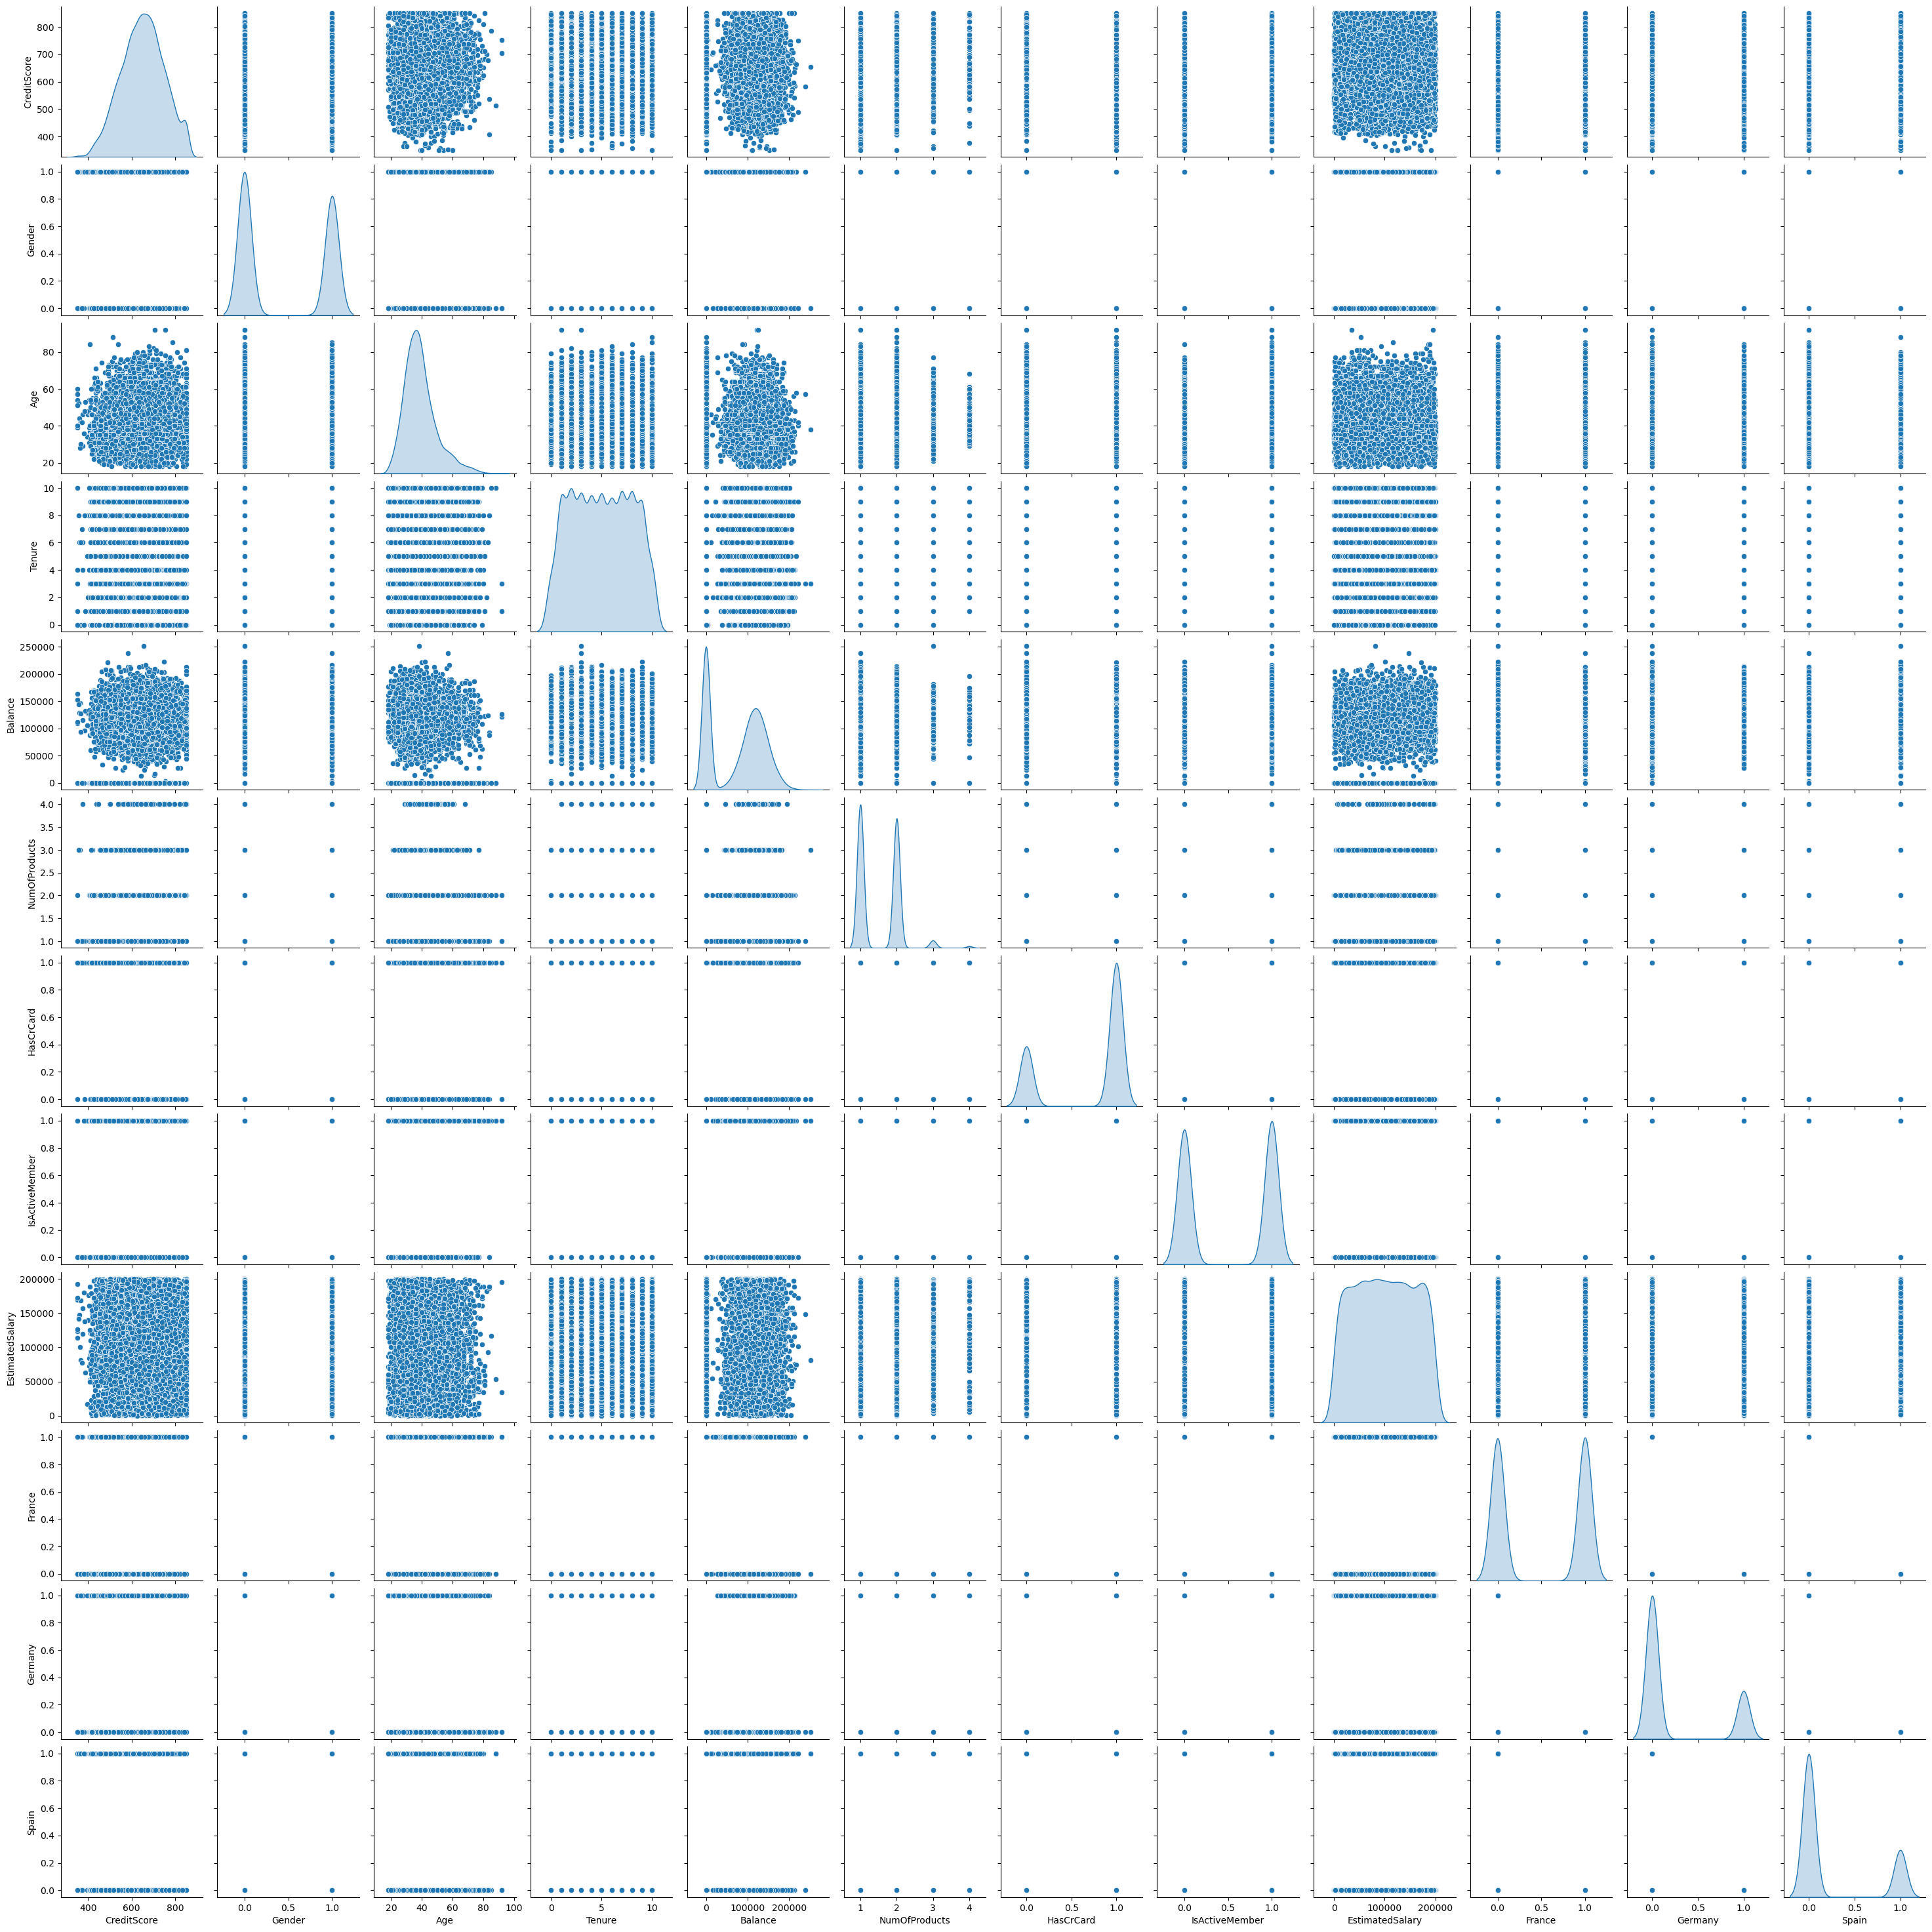

In [10]:
import seaborn as sns
sns.pairplot(data_clean, diag_kind='kde');

In [11]:
data_clean["ProductsPerYear"] = np.where(data_clean.Tenure==0, data_clean.NumOfProducts, data_clean.NumOfProducts / data_clean.Tenure)

In [12]:
data_clean.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,0.5
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,1.0


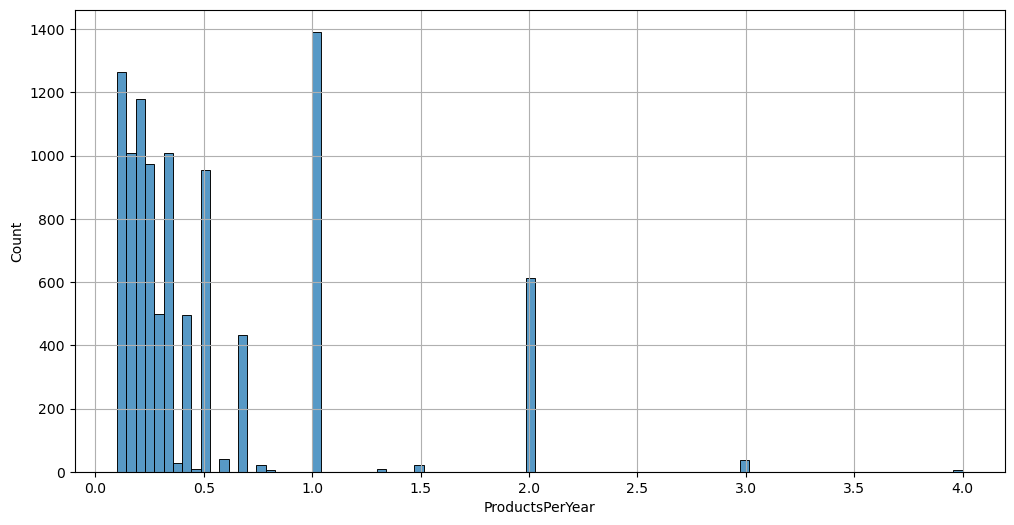

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(data=data_clean, x='ProductsPerYear')
plt.grid(True);

In [14]:
data_clean.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700,0.508523
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698,0.507921
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.100000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.200000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000,0.333333
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,0.666667
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,4.000000


# **Objective 2: Cluster the Customers**

In [16]:
# Standardize the Data
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

data_std = pd.DataFrame(std.fit_transform(data_clean), columns=data_clean.columns)
data_std.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,-0.326221,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,-0.016781
1,-0.440036,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,0.967674
2,-1.536794,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,-0.262894
3,0.501521,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,2.936584
4,2.063884,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,-0.016781


In [17]:
data_std.describe().round(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00,10000.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.0,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
min,-3.11,-0.91,-1.99,-1.73,-1.23,-0.91,-1.55,-1.03,-1.74,-1.0,-0.58,-0.57,-0.80
25%,-0.69,-0.91,-0.66,-0.70,-1.23,-0.91,-1.55,-1.03,-0.85,-1.0,-0.58,-0.57,-0.61
50%,0.02,-0.91,-0.18,-0.00,0.33,-0.91,0.65,0.97,0.00,1.0,-0.58,-0.57,-0.34
75%,0.70,1.10,0.48,0.69,0.82,0.81,0.65,0.97,0.86,1.0,1.73,-0.57,0.31
max,2.06,1.10,5.06,1.72,2.80,4.25,0.65,0.97,1.74,1.0,1.73,1.74,6.87


In [18]:
# Create an Inertia Plot by fitting 2-15 Clusters
from sklearn.cluster import KMeans

inertia_values = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeans.fit(data_std)
    inertia_values.append(kmeans.inertia_)
    

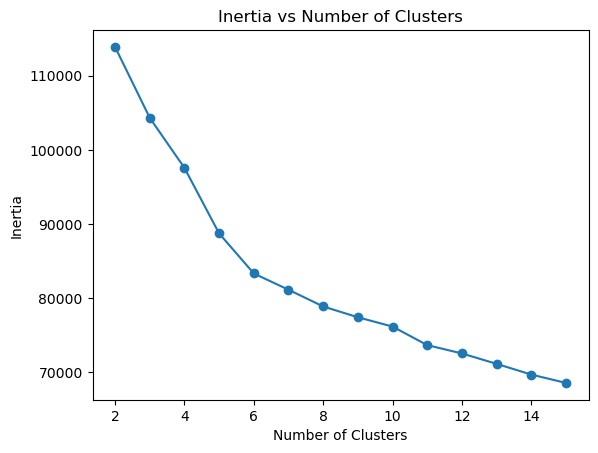

In [19]:
# Create the Inertia Plot
pd.Series(inertia_values, index=range(2,16)).plot(title='Inertia vs Number of Clusters',
                                                 xlabel='Number of Clusters',
                                                 ylabel='Inertia',
                                                 marker='o');

In [20]:
kmeans5 = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans5.fit(data_std)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [21]:
# Number of Customers in each cluster
from collections import Counter
Counter(kmeans5.labels_)

Counter({1: 2342, 2: 2336, 3: 2329, 4: 2306, 0: 687})

In [22]:
cluster_centers = pd.DataFrame(kmeans5.cluster_centers_, columns=data_std.columns)
cluster_centers

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,0.032256,0.069858,0.016895,-1.448942,-0.322927,1.080525,-0.101162,0.064444,0.010705,0.062702,0.002121,-0.074756,3.014442
1,-0.027808,0.023179,-0.028209,0.206850,-1.122714,0.438472,0.033460,0.016776,-0.005910,0.997204,-0.578736,-0.573809,-0.177064
2,0.007985,0.035040,0.082809,0.104814,0.693244,-0.113748,0.014981,-0.049915,0.014085,-1.002804,1.727904,-0.573809,-0.218535
3,0.007514,-0.032825,-0.008060,0.100243,-0.203948,-0.045649,-0.014233,0.032932,-0.009492,-1.002804,-0.578736,1.742740,-0.212312
4,0.002955,-0.046697,-0.052129,0.014167,0.740167,-0.605893,-0.004646,-0.018934,-0.001869,0.997204,-0.578736,-0.573809,-0.282422


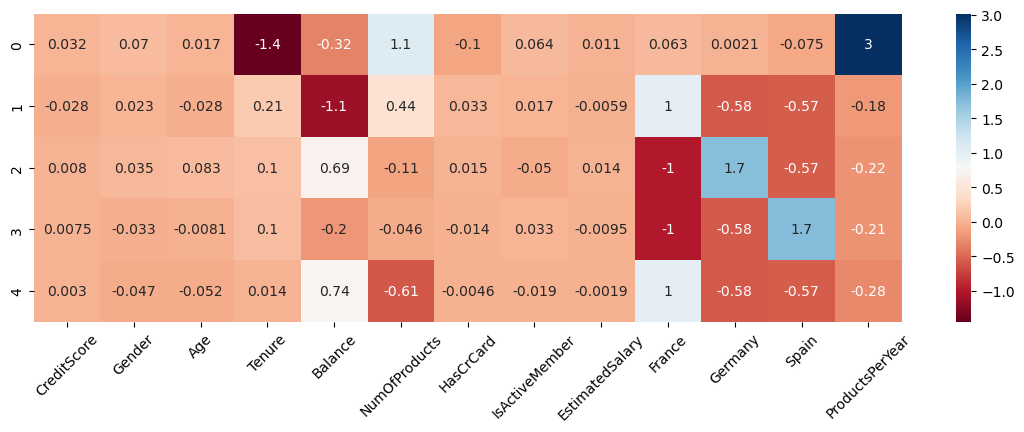

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
sns.heatmap(cluster_centers, annot=True, cmap='RdBu')
plt.xticks(rotation=45);

## Clusters Interpretation

* Cluster 0: Many Products in a short time
* Cluster 1: French Customers with many products and low balance
* Cluster 2: German Customers with high balance
* Cluster 3: Spanish Customers
* Cluster 4: French Customers with few products and high balance

## Checking the Silhouette Score

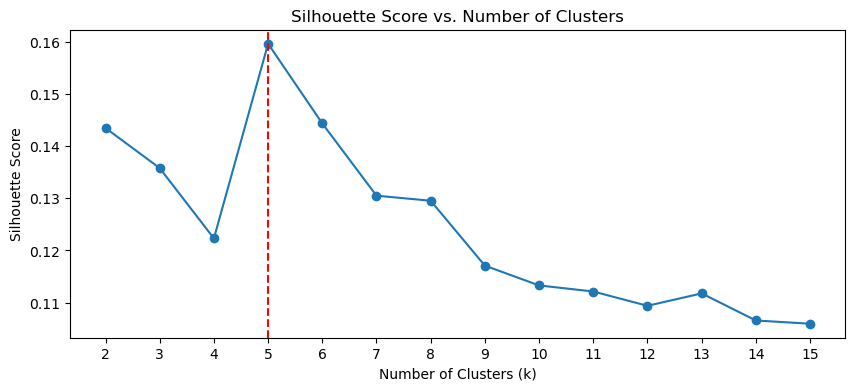

In [27]:
from sklearn.metrics import silhouette_score

score = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeans.fit(data_std)
    score.append(silhouette_score(data_std, kmeans.labels_, metric='euclidean', sample_size=None))

# Plot the silhouette scores for each k
plt.figure(figsize=(10, 4))
plt.plot(range(2, 16), score, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 16))
plt.axvline(5, color='r', linestyle='--')  # Adds a vertical line at k=5
plt.show()

# **Cluster the Customers: Round 2**

## Summary Statistics for each Country

In [30]:
# Create a copy
data_geo = data_subset.copy()

In [31]:
# Convert categorical fields into numeric
data_geo.Gender = np.where(data_geo.Gender=="Female", 1, 0)

In [32]:
# Summary Statistics
data_geo.groupby('Geography').mean()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Geography,,,,,,,,,
France,649.668329,0.450937,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814
Germany,651.453567,0.475488,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102
Spain,651.333872,0.439645,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281


In [33]:
data_geo[data_geo.Geography=='France'].Balance.round(-5).value_counts()

Balance
0.0         2459
100000.0    2123
200000.0     432
Name: count, dtype: int64

In [34]:
data_geo[data_geo.Geography=='Spain'].Balance.round(-5).value_counts()

Balance
0.0         1214
100000.0    1040
200000.0     222
300000.0       1
Name: count, dtype: int64

In [35]:
data_geo[data_geo.Geography=='Germany'].Balance.round(-5).value_counts()

Balance
100000.0    2176
200000.0     314
0.0           19
Name: count, dtype: int64

## Exclude the countries from the model

In [37]:
data_std.drop(['France', 'Germany', 'Spain'], axis=1, inplace=True)

In [38]:
data_std.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,ProductsPerYear
0,-0.326221,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.016781
1,-0.440036,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0.967674
2,-1.536794,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.262894
3,0.501521,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,2.936584
4,2.063884,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.016781


In [39]:
## KMeans model without the country fields
inertia_values = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeans.fit(data_std)
    inertia_values.append(kmeans.inertia_)

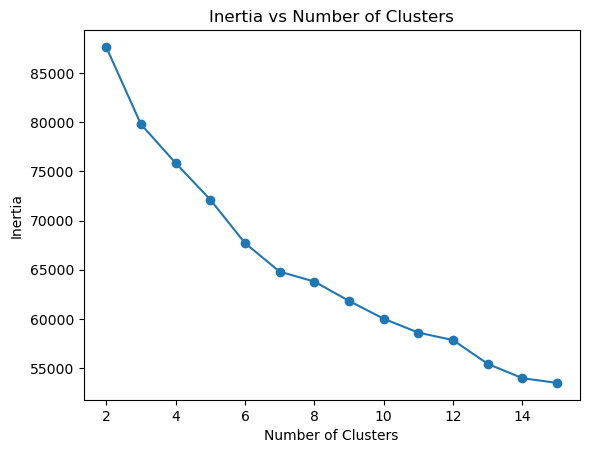

In [40]:
pd.Series(inertia_values, index=range(2,16)).plot(title='Inertia vs Number of Clusters',
                                                 xlabel='Number of Clusters',
                                                 ylabel='Inertia',
                                                 marker='o');

In [41]:
# Fitting a KMeans Model with 4 clusters
kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans4.fit(data_std)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [42]:
Counter(kmeans4.labels_)

Counter({2: 3250, 0: 2338, 1: 2276, 3: 2136})

In [43]:
cluster_centers = pd.DataFrame(kmeans4.cluster_centers_, columns=data_std.columns)
cluster_centers

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,ProductsPerYear
0,0.000649,0.015331,-0.036142,0.401545,-1.054059,0.514320,0.645153,-0.004539,-0.007531,-0.330735
1,0.006957,0.002659,-0.000378,0.352898,0.035970,-0.085917,-1.547768,0.000556,0.020788,-0.437526
2,-0.014430,-0.038339,0.009335,0.334328,0.746821,-0.491940,0.646092,-0.036680,-0.004676,-0.510206
3,0.013818,0.038684,0.025751,-1.323463,-0.020542,0.276735,-0.039682,0.060141,-0.006793,1.603523


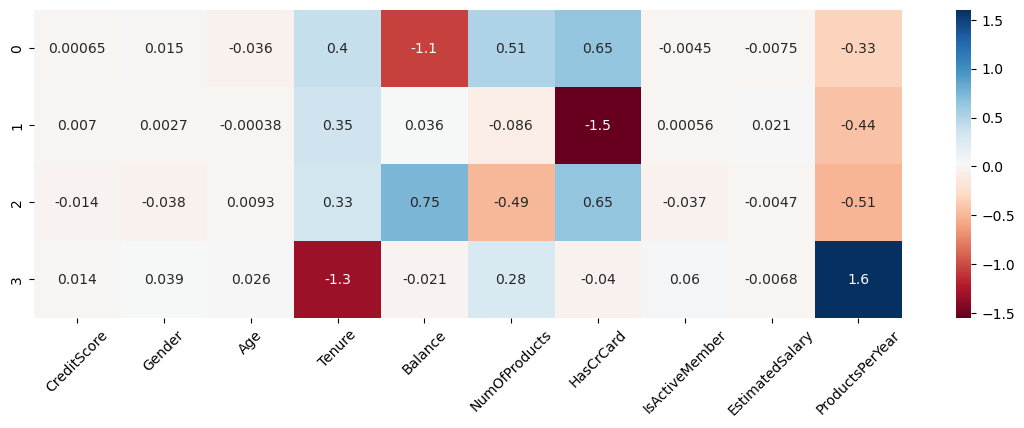

In [44]:
plt.figure(figsize=(14, 4))
sns.heatmap(cluster_centers, annot=True, cmap='RdBu')
plt.xticks(rotation=45);

## Clusters Interpretation

* Cluster 0: low balance, more products , have a credit card
* Cluster 1: Customers who don't have a credit card
* Cluster 2: High balance, low number of products, have a credit card
* Cluster 3: Many products in a short amount of time

# **Explore the Clusters and make Recommendations**

## Create a Dataframe using the Exited column and kmeans4.labels_ to determine the churn rate per cluster

In [178]:
data_final = pd.concat([data_clean, pd.Series(kmeans4.labels_, name='Cluster'), pd.Series(data.Exited, name='Exited')], axis=1)
data_final.groupby('Cluster').mean()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear,Exited
Cluster,,,,,,,,,,,,,,
0,650.591531,0.461933,38.542772,6.174080,10718.632947,1.829341,0.999572,0.512831,99657.165907,0.628315,0.058169,0.313516,0.340544,0.164243
1,651.201230,0.455624,38.917838,6.033392,78730.204165,1.480228,0.000000,0.515378,101285.720879,0.500439,0.240334,0.259227,0.286305,0.209578
2,649.112615,0.435385,39.020615,5.978769,123087.696920,1.244308,1.000000,0.496923,99816.928034,0.421231,0.381538,0.197231,0.249520,0.226462
3,651.898408,0.473315,39.190543,1.184457,75174.985665,1.691011,0.687266,0.544944,99706.286559,0.485487,0.274345,0.240169,1.323252,0.205993


In [157]:
# Geography breakdown per cluster
geo_final = pd.concat([data_subset.Geography, pd.Series(kmeans4.labels_, name='Cluster'), pd.Series(data.Exited, name='Exited')], axis=1)
geo_final.head()

,Geography,Cluster,Exited
0,France,0,1
1,Spain,3,0
2,France,2,1
3,France,3,0
4,Spain,2,0


In [183]:
# Churn Rate per Country
geo_final.groupby('Geography')['Exited'].mean()

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

In [163]:
# Churn Rate per Cluster for each Country
geo_final.groupby(['Geography', 'Cluster'])['Exited'].mean()

Geography  Cluster
France     0          0.156569
           1          0.168569
           2          0.168736
           3          0.151398
Germany    0          0.389706
           1          0.323583
           2          0.320968
           3          0.317406
Spain      0          0.137790
           1          0.183051
           2          0.166927
           3          0.189084
Name: Exited, dtype: float64

# Recommendations

* Cluster 0: low balance, more products , have a credit card
* Cluster 1: Customers who don't have a credit card
* Cluster 2: High balance, low number of products, have a credit card
* Cluster 3: Many products in a short amount of time

* For Cluster 0: Reward them for the tenure
* For Cluster 1: Offer an entry leve credit card
* For Cluster 2: Find a solution to entice them and reduce the churn rate
* For Cluster 3: Encourage them to stay